<a href="https://colab.research.google.com/github/Broklink/Data-test/blob/main/Copy_of_Regression_NonLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Gathering

In [22]:
# Connect to GoogleDrive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Read a file from GoogleDrive.
file_path = '/content/drive/MyDrive/Colab Notebooks/vgsales.csv'
df = pd.read_csv(file_path)

In [24]:
# Display the first 5 rows to get a quick look at the data structure.
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
# Check total length of dataset.
len(df)

16598

In [26]:
# Check for data type in each column.
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [27]:
# Define target and features.
label = 'Global_Sales'
num_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year']
cate_features = ['Platform', 'Genre', 'Publisher']
features = num_features + cate_features

## Data Preprocessing

### Universal Data Cleaning

#### Duplicate Data

In [28]:
# Check duplicate rows.
df[df.duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


#### Missing Data

In [29]:
# Check for missing values in each column.
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [30]:
# Remove missing target.
df = df.dropna(subset=['Year','Publisher'])
df = df.reset_index(drop=True)

#### Distribution

In [31]:
# Check continuous features values.
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


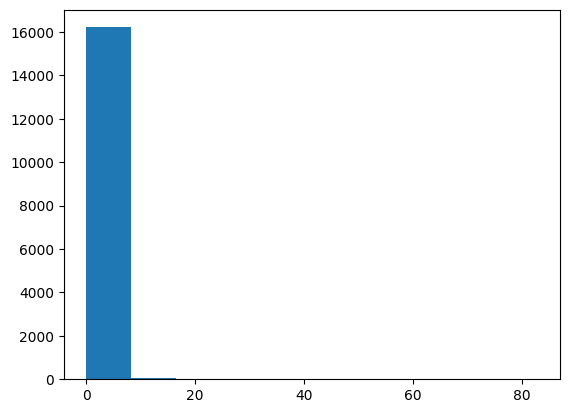

In [32]:
# Check distribution.
plt.hist(df['Global_Sales'])
plt.show()

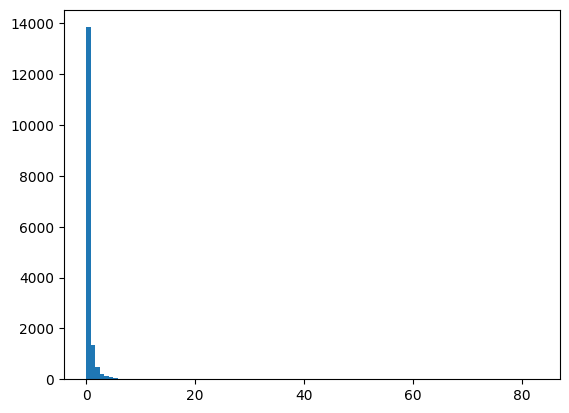

In [37]:
# Check distribution in more detail.
plt.hist(df['Global_Sales'], bins=100)
plt.show()

In [44]:
# Log-transform
df['Global_Sales_log'] = np.log1p(df['Global_Sales'])  # log(1 + x) ใช้กับ 0 ได้

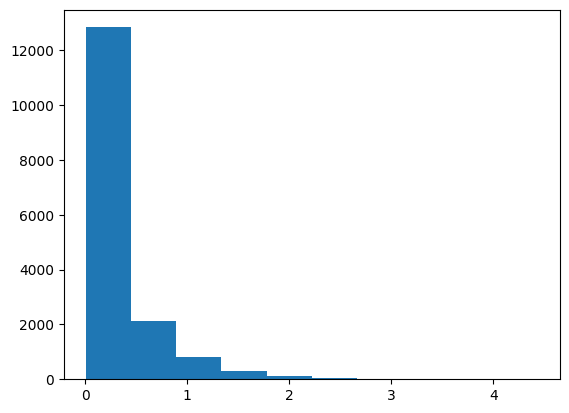

In [45]:
# Check values after cleansing.
plt.hist(df['Global_Sales_log'])
plt.show()

In [46]:
# Check categorical features values.
for col in cate_features:
  print(df[col].value_counts())
  print('\n')

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64


Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
King Records                       1
Graph

### Data Exploration

In [53]:
# Define target and features.
label = 'Global_Sales_log'
num_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year']
cate_features = ['Platform', 'Genre', 'Publisher']
features = num_features + cate_features

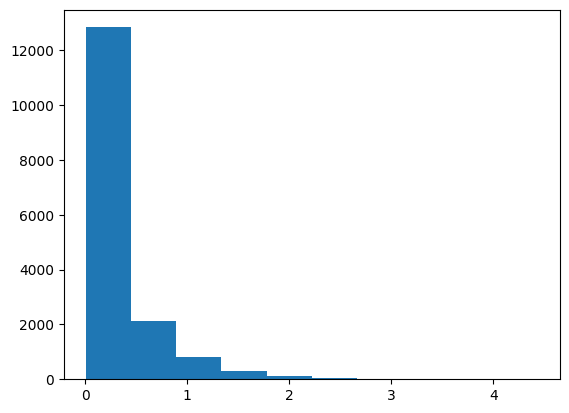

In [54]:
# Check label distribution.
plt.hist(df[label])
plt.show()

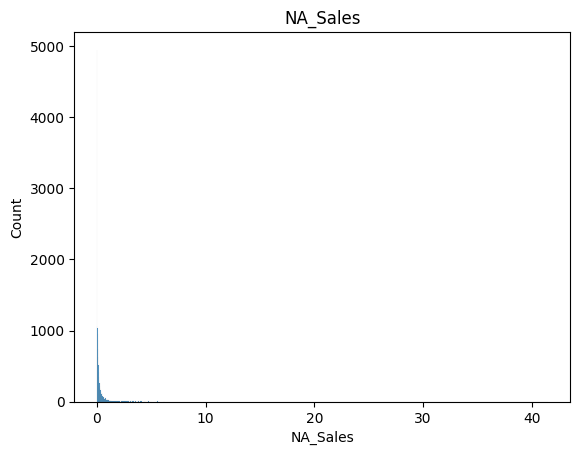

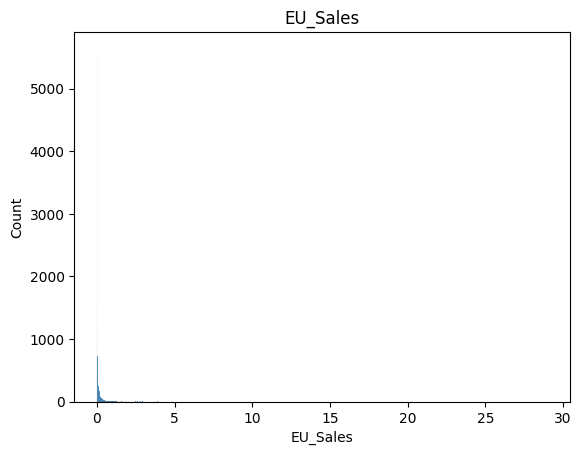

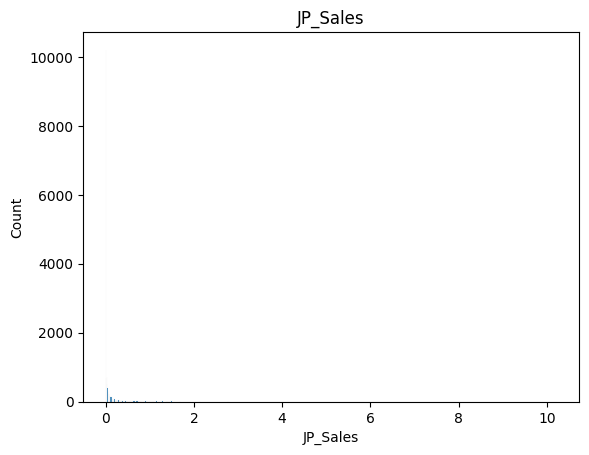

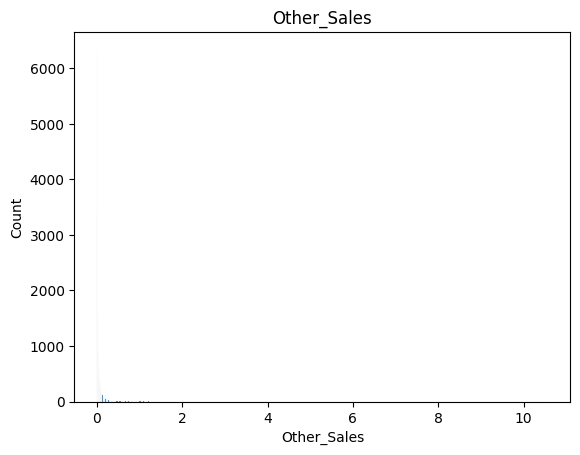

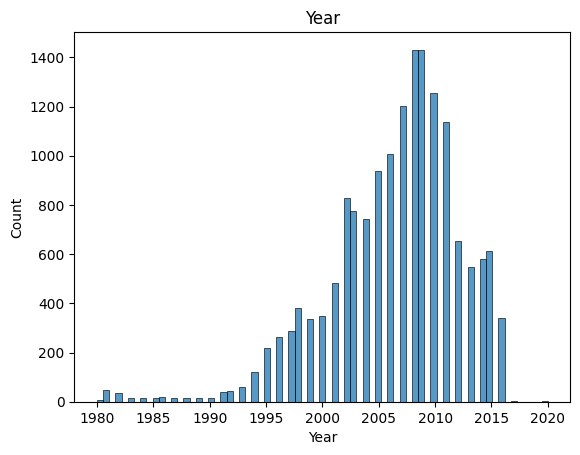

In [55]:
# Check continuous features distribution.
for col in num_features:
  plt.figure()
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

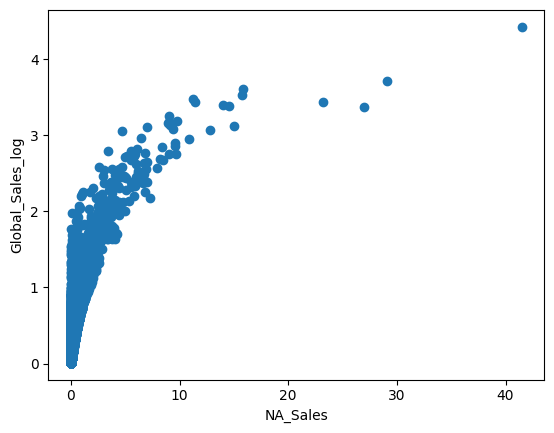

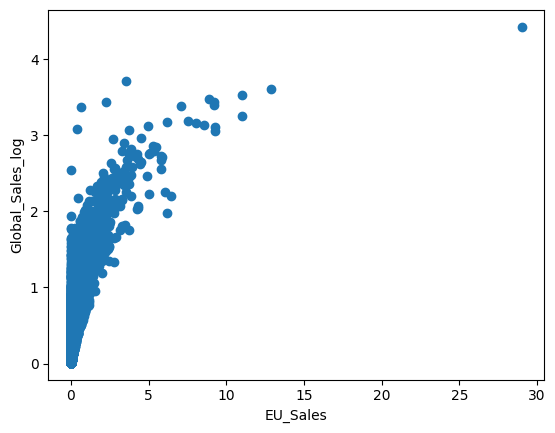

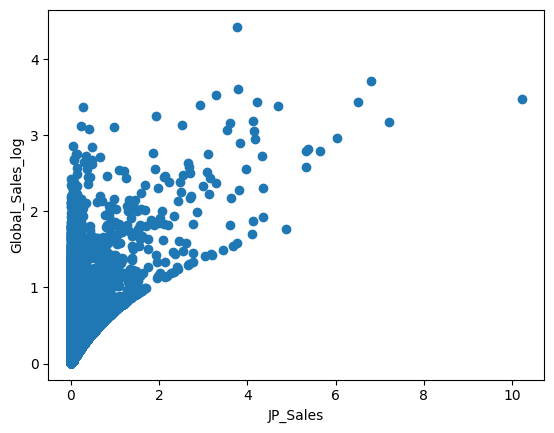

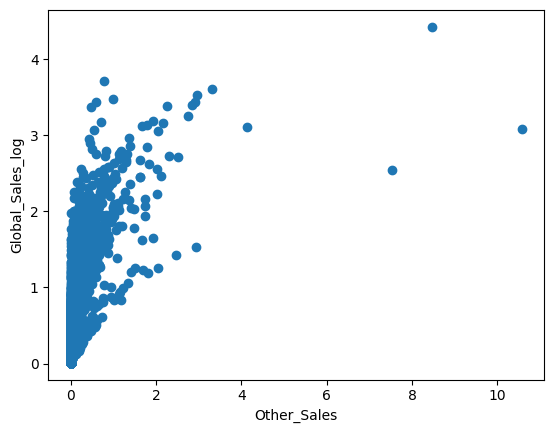

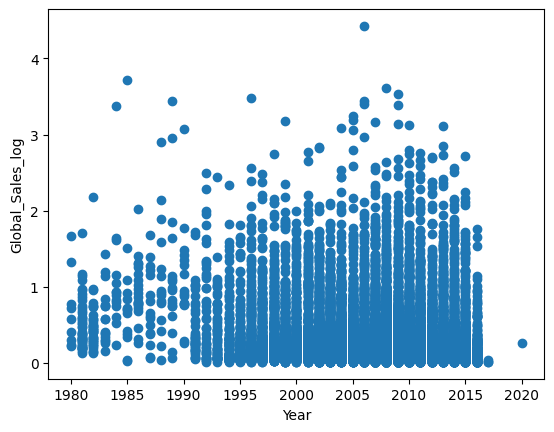

In [56]:
# Check continuous features relationship.
for col in num_features:
  plt.figure()
  plt.scatter(df[col], df[label])
  plt.xlabel(col)
  plt.ylabel(label)
  plt.show()

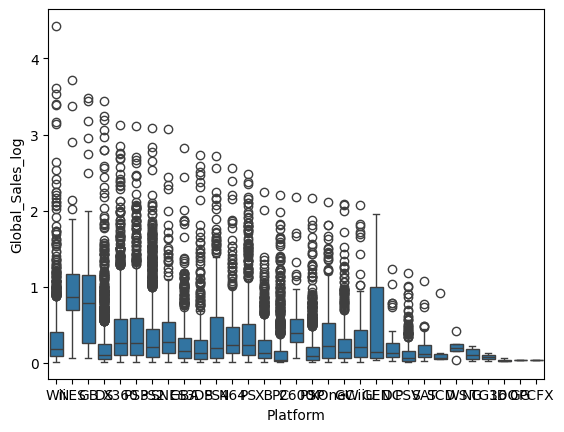

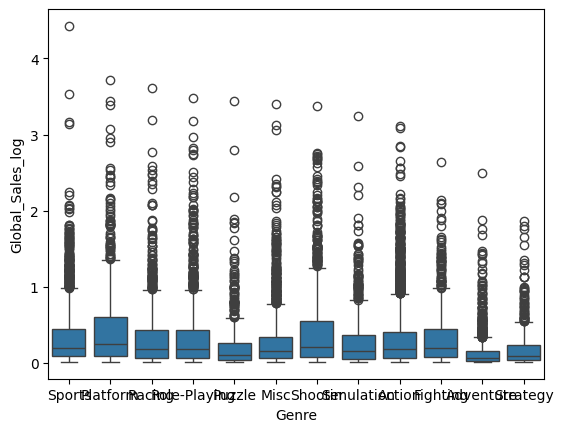

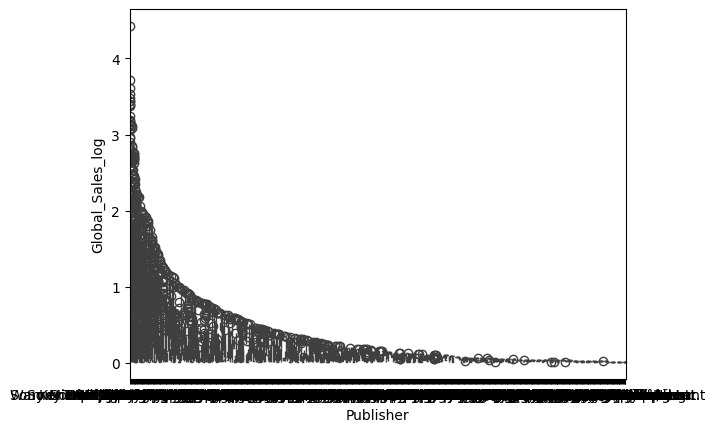

In [57]:
# Check categorical features relationship.
for col in cate_features:
  plt.figure()
  sns.boxplot(x=col, y=label, data=df)
  plt.xlabel(col)
  plt.ylabel(label)
  plt.show()

### Data Splitting

In [58]:
# Defind X and y
X = df[features]
y = df[label]

In [59]:
# Spit training set test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Spit validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [61]:
# Reset index
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Data Cleansing

Missing Data

In [62]:
# Crate continuous features imputer.
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[num_features])

SimpleImputer(strategy='median')

In [63]:
# Impute continuous features.
X_train[num_features] = num_imputer.transform(X_train[num_features])
X_val[num_features] = num_imputer.transform(X_val[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

In [64]:
# Create categorical features imputer.
cate_imputer = SimpleImputer(strategy='most_frequent')
cate_imputer.fit(X_train[cate_features])

SimpleImputer(strategy='most_frequent')

In [65]:
# Impute categorical features.
X_train[cate_features] = cate_imputer.transform(X_train[cate_features])
X_val[cate_features] = cate_imputer.transform(X_val[cate_features])
X_test[cate_features] = cate_imputer.transform(X_test[cate_features])

In [66]:
# Check for missing values in each column in training set.
X_train.isnull().sum()

,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Year,0
Platform,0
Genre,0
Publisher,0


In [67]:
# Check for missing values in each column in validation set.
X_val.isnull().sum()

,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Year,0
Platform,0
Genre,0
Publisher,0


In [68]:
# Check for missing values in each column in test set.
X_test.isnull().sum()

,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Year,0
Platform,0
Genre,0
Publisher,0


Encoding

In [76]:
# Encode categorical features.
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train[cate_features])

X_train[cate_features] = encoder.transform(X_train[cate_features])
X_val[cate_features]   = encoder.transform(X_val[cate_features])
X_test[cate_features]  = encoder.transform(X_test[cate_features])

In [77]:
X_train

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Platform,Genre,Publisher
0,0.00,0.00,0.09,0.00,2012.0,18.0,1.0,64.0
1,0.04,0.03,0.11,0.01,2007.0,15.0,7.0,284.0
2,3.88,3.42,1.69,0.50,1999.0,14.0,6.0,355.0
3,0.05,0.04,0.00,0.01,2007.0,15.0,6.0,69.0
4,0.12,0.00,0.00,0.01,2008.0,25.0,5.0,439.0
...,...,...,...,...,...,...,...,...
7977,0.05,0.11,0.00,0.02,2010.0,27.0,3.0,253.0
7978,0.20,0.31,0.00,0.13,2013.0,16.0,8.0,347.0
7979,0.69,0.89,0.03,0.14,2015.0,29.0,6.0,253.0
7980,0.17,0.04,0.00,0.00,2000.0,9.0,6.0,255.0


## Model Training

### Hyper Parameter Tuning

In [78]:
# Create hyperparameter
n_estimators_list = [100, 200, 400]
max_depth_list = [5, 10, 20]
min_samples_split_list = [2, 5]

# Set up initial mean square error.
min_mse = np.inf

# Set up initial hyperparameter.
best_n_estimators = None
best_max_depth = None
best_min_samples_split = None

# Iterate to find the best hyperparameter.
for n_estimators in n_estimators_list:
  for max_depth in max_depth_list:
    for min_samples_split in min_samples_split_list:
      # Fit model on each setting.
      model = RandomForestRegressor(
          n_estimators=n_estimators,
          max_depth=max_depth,
          min_samples_split=min_samples_split,
          random_state=42
      )

      model.fit(X_train, y_train)

      # Test result on validation set.
      y_pred = model.predict(X_val)
      mse = mean_squared_error(y_val, y_pred)

      # Keep the setting if performance improve.
      if mse < min_mse:
        min_mse = mse
        best_n_estimators = n_estimators
        best_max_depth = max_depth
        best_min_samples_split = min_samples_split

# Check the best setting.
print(f"best_n_estimators: {best_n_estimators}")
print(f"best_max_depth: {best_max_depth}")
print(f"best_min_samples_split: {best_min_samples_split}")
print(f"min_mse: {min_mse}")

best_n_estimators: 200
best_max_depth: 20
best_min_samples_split: 2
min_mse: 0.0015882082909464022


### Fit Model

In [79]:
# Train model again with best setting.
model = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

### Feature Importance

In [80]:
pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values(
    by='Importance',
    ascending=False
)

,Feature,Importance
0,NA_Sales,0.678243
1,EU_Sales,0.159178
3,Other_Sales,0.087699
2,JP_Sales,0.072856
4,Year,0.000634
6,Genre,0.000496
7,Publisher,0.000450
5,Platform,0.000444


## Model Evaluation

Evaluate training set

In [81]:
# Predict training set.
y_pred = model.predict(X_train)

In [82]:
# Calculate metrics.
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

In [83]:
# Print results.
print(f"Mean: {y_train.mean():.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean: 0.30
R-squared (R²): 1.00
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.01


Evaluate test set

In [84]:
# Predict test set.
y_pred = model.predict(X_test)

In [85]:
# Calculate metrics.
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [86]:
# Print results.
print(f"Mean: {y_test.mean():.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean: 0.31
R-squared (R²): 0.99
Mean Absolute Error (MAE): 0.01
Root Mean Squared Error (RMSE): 0.03
